In [1]:
# cloning the repo
!git clone https://github.com/kishkath/ERA.git

Cloning into 'ERA'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 151 (delta 70), reused 65 (delta 12), pack-reused 0
Receiving objects: 100% (151/151), 1.82 MiB | 10.26 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [2]:
import os 
os.chdir("/kaggle/working/ERA/8 - Normalization & Regularization Techniques/")

In [3]:
!pip install torchsummary

In [4]:
from utility.dataset import loader
from utility.run import Performance,scores
from utility.visualize import Plots,plot_metrics
from models.model3 import NetArch,return_summary
from utility.utils import allot_device

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 

import torchvision
import torchvision.transforms as transforms

from tqdm import tqdm
import matplotlib.pyplot as plt 
import numpy as np
from torchsummary import summary

In [6]:
## Setting up the device 
device = allot_device(42)
print(f"{device} is available")

cuda is available


In [7]:
## Lets load the data
train_loader,test_loader = loader.load_data(256)
print(len(train_loader),len(test_loader))

/opt/conda/lib/python3.10/site-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(
100%|██████████| 170498071/170498071 [00:01<00:00, 105798501.23it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
196 40


<Figure size 640x480 with 0 Axes>

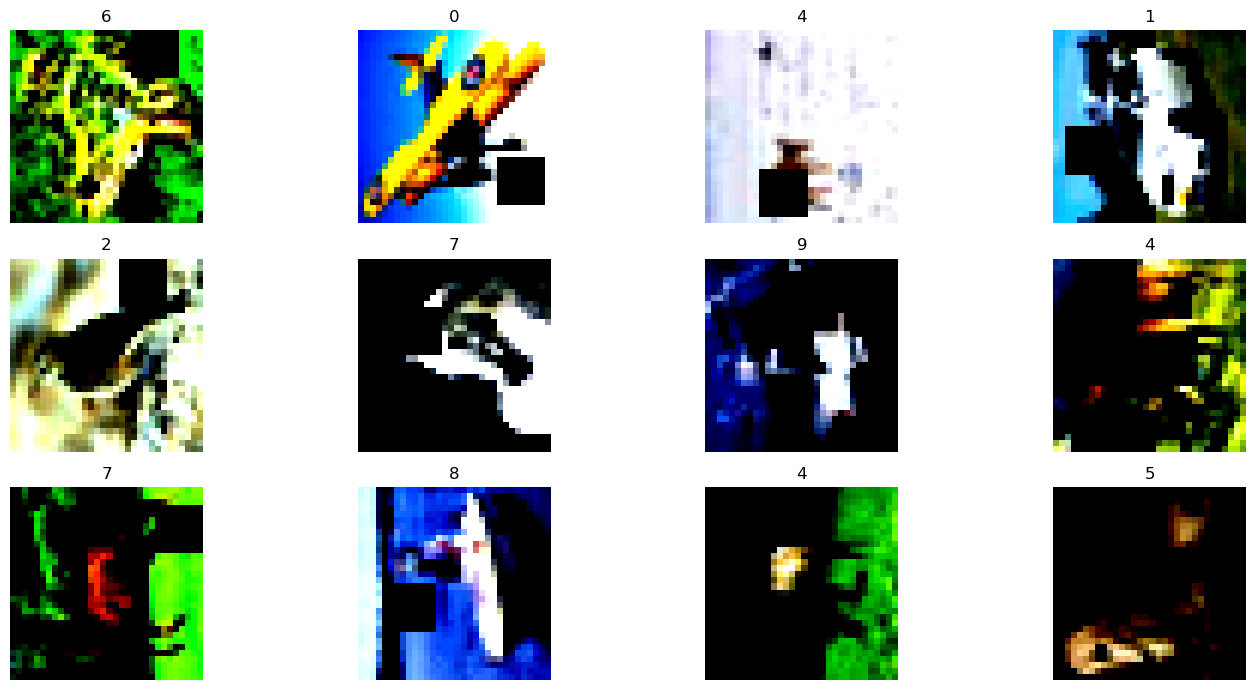

In [8]:
## Visualize train images
Plots(None,12,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

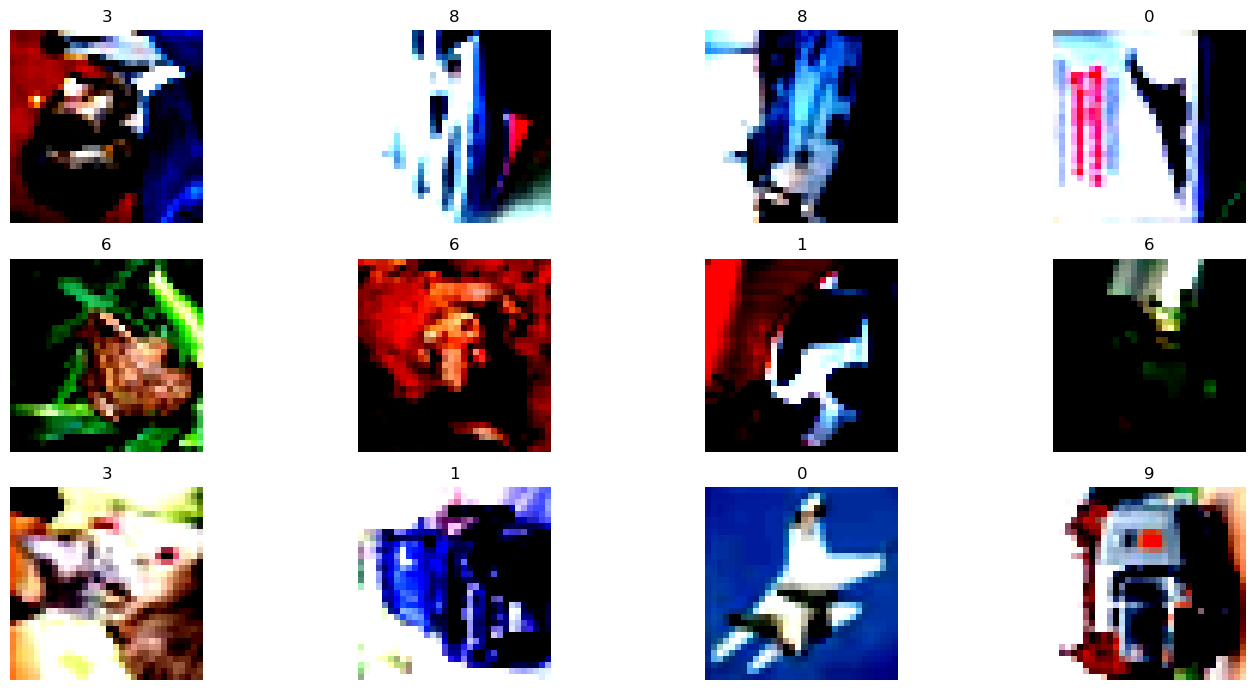

In [9]:
## Visualize test images
Plots(None,12,test_loader).plot_images()

In [10]:
model = NetArch().to(device)
return_summary(model,device,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
         GroupNorm-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,304
         GroupNorm-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 20, 32, 32]             320
              ReLU-8           [-1, 20, 32, 32]               0
         MaxPool2d-9           [-1, 20, 16, 16]               0
           Conv2d-10           [-1, 20, 16, 16]           3,600
        GroupNorm-11           [-1, 20, 16, 16]              40
             ReLU-12           [-1, 20, 16, 16]               0
           Conv2d-13           [-1, 20, 16, 16]           3,600
        GroupNorm-14           [-1, 20,

In [11]:
optimizer = optim.Adam(model.parameters(), lr=0.01,weight_decay=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20
perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion,[False,0.1])

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  perf.train()
  perf.test()
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.8507 Batch_id=195 Accuracy=24.69: 100%|██████████| 196/196 [00:22<00:00,  8.90it/s]


Test set: Average loss: 0.0073, Accuracy: 3058/10000 (30.58%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.6707 Batch_id=195 Accuracy=36.19: 100%|██████████| 196/196 [00:19<00:00,  9.87it/s]


Test set: Average loss: 0.0063, Accuracy: 4155/10000 (41.55%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.3519 Batch_id=195 Accuracy=44.26: 100%|██████████| 196/196 [00:19<00:00, 10.13it/s]


Test set: Average loss: 0.0056, Accuracy: 4815/10000 (48.15%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.1923 Batch_id=195 Accuracy=49.99: 100%|██████████| 196/196 [00:19<00:00,  9.85it/s]


Test set: Average loss: 0.0054, Accuracy: 5031/10000 (50.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=1.2594 Batch_id=195 Accuracy=53.40: 100%|██████████| 196/196 [00:19<00:00,  9.85it/s]


Test set: Average loss: 0.0049, Accuracy: 5600/10000 (56.00%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


Train: Loss=1.2672 Batch_id=195 Accuracy=59.38: 100%|██████████| 196/196 [00:19<00:00, 10.12it/s]


Test set: Average loss: 0.0043, Accuracy: 6081/10000 (60.81%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=1.0271 Batch_id=195 Accuracy=60.75: 100%|██████████| 196/196 [00:19<00:00, 10.26it/s]


Test set: Average loss: 0.0042, Accuracy: 6161/10000 (61.61%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=1.0005 Batch_id=195 Accuracy=61.30: 100%|██████████| 196/196 [00:19<00:00, 10.07it/s]


Test set: Average loss: 0.0042, Accuracy: 6247/10000 (62.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=1.2723 Batch_id=195 Accuracy=62.19: 100%|██████████| 196/196 [00:19<00:00, 10.00it/s]


Test set: Average loss: 0.0041, Accuracy: 6292/10000 (62.92%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.9034 Batch_id=195 Accuracy=62.98: 100%|██████████| 196/196 [00:19<00:00, 10.22it/s]


Test set: Average loss: 0.0041, Accuracy: 6386/10000 (63.86%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 11


Train: Loss=0.9170 Batch_id=195 Accuracy=64.21: 100%|██████████| 196/196 [00:19<00:00,  9.95it/s]


Test set: Average loss: 0.0040, Accuracy: 6424/10000 (64.24%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 12


Train: Loss=1.3152 Batch_id=195 Accuracy=64.17: 100%|██████████| 196/196 [00:19<00:00,  9.91it/s]


Test set: Average loss: 0.0040, Accuracy: 6437/10000 (64.37%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=1.3178 Batch_id=195 Accuracy=64.12: 100%|██████████| 196/196 [00:19<00:00, 10.14it/s]


Test set: Average loss: 0.0040, Accuracy: 6454/10000 (64.54%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.9819 Batch_id=195 Accuracy=64.37: 100%|██████████| 196/196 [00:19<00:00,  9.98it/s]


Test set: Average loss: 0.0039, Accuracy: 6452/10000 (64.52%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=1.1407 Batch_id=195 Accuracy=64.65: 100%|██████████| 196/196 [00:19<00:00, 10.02it/s]


Test set: Average loss: 0.0039, Accuracy: 6473/10000 (64.73%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 16


Train: Loss=0.8666 Batch_id=195 Accuracy=64.51: 100%|██████████| 196/196 [00:19<00:00, 10.11it/s]


Test set: Average loss: 0.0039, Accuracy: 6486/10000 (64.86%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 17


Train: Loss=0.9397 Batch_id=195 Accuracy=64.56: 100%|██████████| 196/196 [00:19<00:00, 10.17it/s]


Test set: Average loss: 0.0039, Accuracy: 6479/10000 (64.79%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 18


Train: Loss=1.0863 Batch_id=195 Accuracy=64.75: 100%|██████████| 196/196 [00:19<00:00,  9.96it/s]


Test set: Average loss: 0.0039, Accuracy: 6470/10000 (64.70%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 19


Train: Loss=0.8361 Batch_id=195 Accuracy=64.19: 100%|██████████| 196/196 [00:19<00:00,  9.91it/s]


Test set: Average loss: 0.0039, Accuracy: 6481/10000 (64.81%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 20


Train: Loss=1.0554 Batch_id=195 Accuracy=64.43: 100%|██████████| 196/196 [00:19<00:00, 10.09it/s]


Test set: Average loss: 0.0039, Accuracy: 6476/10000 (64.76%)

Adjusting learning rate of group 0 to 1.0000e-06.


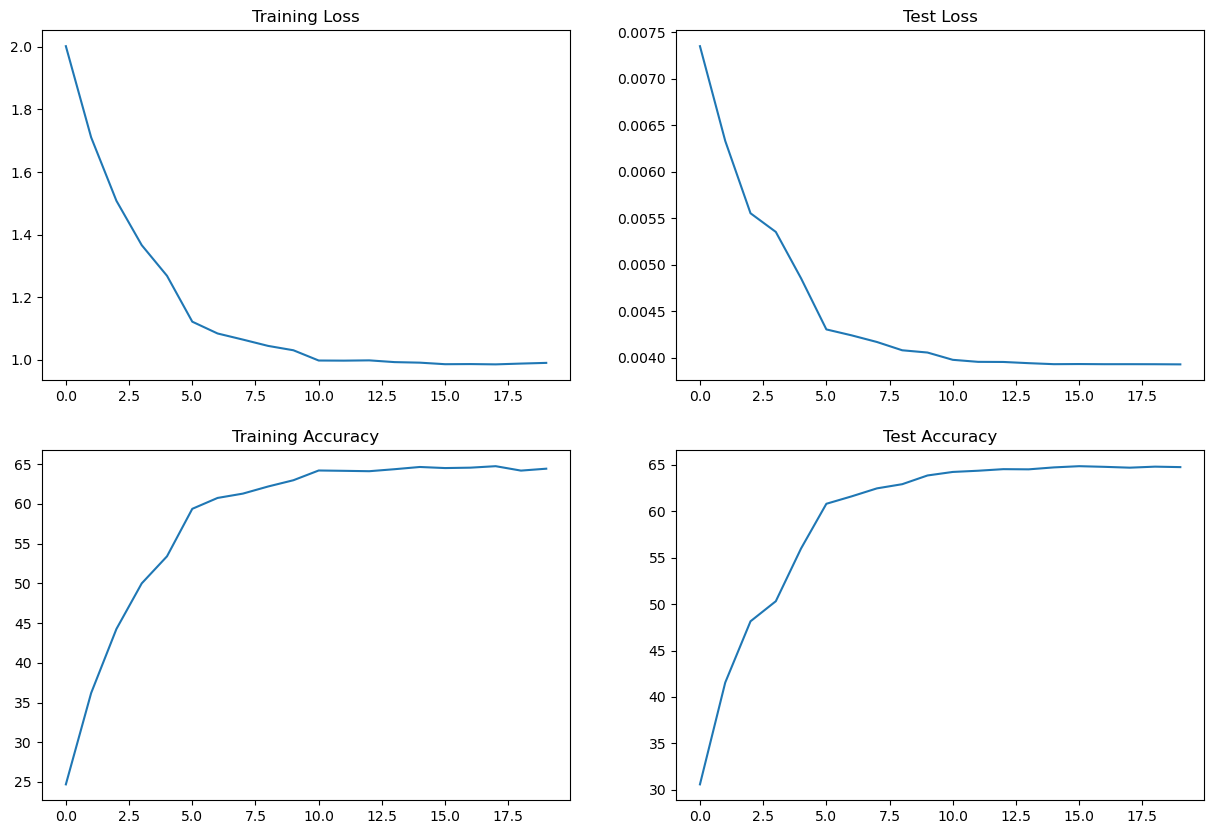

In [15]:
metrics = scores()
plot_metrics(metrics)

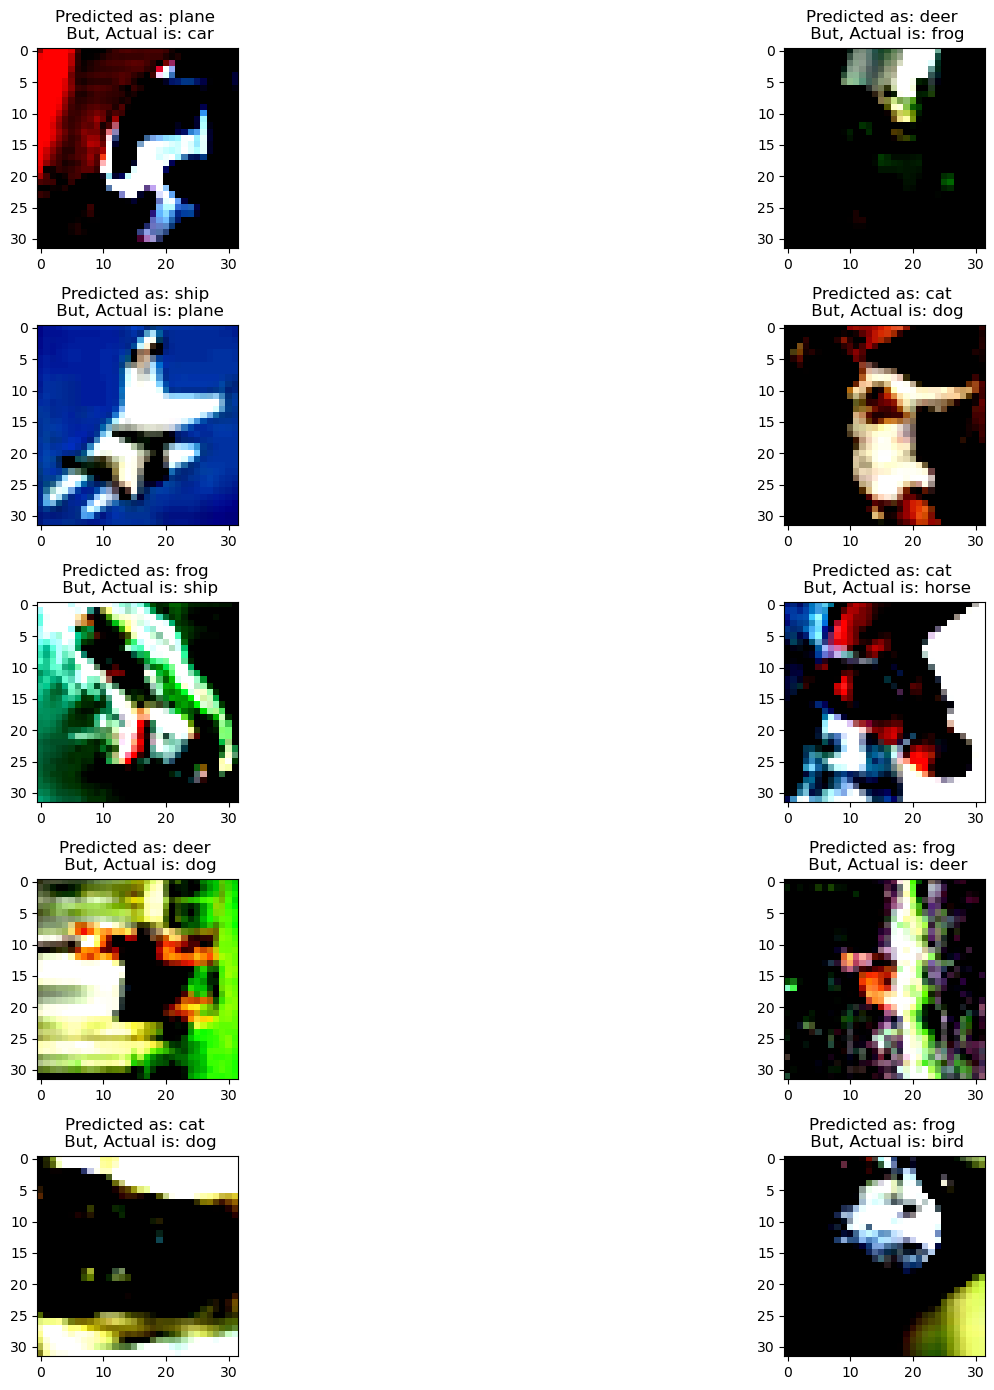

In [16]:
## Visualizing Mis-classified Images

Plots((model,test_loader,device,10)).mis_classified()

In [17]:
torch.save(model,"model_gn.pt")